Переменные из таблицы events.csv:

id_odsp - уникальный идентификатор игры
id_event - уникальный идентификатор события (id_odsp + sort_order)
sort_order - хронологическая последовательность событий в игре
time - минута игры
text - текстовый комментарий
event_type - основное событие. 11 уникальных событий (1-Попытка(удар), 2-Угловой, 3-Фол, 4-Желтая карточка, 5-Вторая желтая карточка, 6-(Прямая) красная карточка, 7-Замена, 8-Выигранный штрафной, 9-Офсайд, 10-Игра рукой, 11-Пропущенный пенальти)
side - 1-Хозяева, 2-В гостях
event_team - команда, которая произвела событие. В случае с собственными голами команда события — это команда, которая выиграла от собственного гола
opponent — команда, против которой произошло событие
player — имя игрока, участвовавшего в главном событии (переведено в нижний регистр, специальные символы удалены)
player2 — имя игрока, участвовавшего во второстепенном событии
player_in — игрок, который вышел на замену (применяется только к заменам)
player_out — замененный игрок (применяется только к заменам)
shot_place — место удара (13 возможных мест удара, доступно в словаре, применяется только к ударам)
shot_outcome — 4 возможных результата (1 — в створ, 2 — мимо цели, 3 — заблокирован, 4 — попал в штангу)
is_goal — бинарная переменная, если удар привел к голу (включая собственные голы)
location — место на поле, где произошло событие (19 возможных мест, доступно в словаре)
bodypart — (1 — правая нога, 2 — левая нога, 3 — голова)
assist_method - в случае голевой передачи, 5 возможных методов голевой передачи (подробности в словаре)
situation - 4 типа: 1-Открытая игра, 2-Стандартное положение (исключая штрафные удары), 3-Угловой, 4-Штрафной удар
fast_break - бинарный

Переменные из таблицы ginf.csv:

id_odsp - уникальный идентификатор игры
link_odsp - ссылка на страницу oddsportal
adv_stats - логическое значение, если в игре есть подробные данные о событиях
date - дата игры
league - клубная лига
season - год игры
country - страна-хозяин лиги
ht - домашняя команда
at - гостевая команда
fthg - домашние голы в полном времени
ftag - выездные голы в полном времени
odd_h - самые высокие коэффициенты рынка домашней победы
odd_d - самые высокие коэффициенты рынка ничьей
odd_a - самые высокие коэффициенты рынка выездных матчей
odd_over - самые высокие коэффициенты рынка больше 2,5

# Анализ карьеры Лионеля Месси

Лионель Месси — аргентинский футболист, признанный одним из лучших в мире. 

Родился 24 июня 1987 года в городе Росарио. Начал играть в футбол в пять лет в любительском клубе «Грандоли», куда его привела бабушка. 2 С первых дней проявлял качества результативного нападающего: голевое чутье, напор, быстрота реакции, скорость, целеустремлённость и концентрация на ворота соперника. 

В составе молодёжной сборной Аргентины Месси стал чемпионом мира 2005 года и в том же году дебютировал за основную сборную Аргентины. В 2007 году на Кубке Америки стал серебряным призёром турнира, а также был признан его лучшим молодым игроком. В составе сборной до 23 лет стал олимпийским чемпионом 2008 года. 

В 2021 году Месси перешёл во французский «Пари Сен-Жермен». 3 С клубом из Парижа аргентинец дважды выиграл чемпионат Франции, завоевал Суперкубок страны-2022 и получил седьмой по счёту «Золотой мяч».

В 2022 году выиграл Финалиссиму и чемпионат мира.

И да, <b>я являюсь его фанатом!</b>

## Исследовательский анализ данных (EDA)

### Импорт необходимых библиотек

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *
import seaborn as sns
from datetime import datetime

### Загрузка и предварительная обработка наборов данных

#### Набор данных событий

Набор данных обеспечивает детальное представление **9074 игр**, в общей сложности **941009 событий** из 5 крупнейших европейских футбольных лиг: Бундеслига (Германия), Ла Лига (Испания), Лига 1 (Франция), Премьер-лига (Англия) и Серия А (Италия) с сезона **2011/2012** по сезон **2016/2017**.

In [4]:
events = pd.read_csv("Data/events.csv")
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

Набор данных состоит из **22 столбцов**, описывающих различные элементы, связанные с футбольным событием, такие как участвующий игрок и команда соперника.

In [4]:
events.head(5)

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0


Здесь мы видим, что некоторые столбцы, такие как *shot_place*, *shot_outcome* и *location*, имеют числовые значения. Эти числовые значения указывают на различные возможные значения для конкретного столбца. Эти возможные значения для каждого столбца указаны в текстовом файле *dictionary.txt*. Этот текстовый файл будет использоваться позже для замены числовых значений на соответствующие значения для столбцов.

#### Сводная статистика для набора данных событий

In [5]:
events.describe()

,sort_order,time,event_type,event_type2,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
count,941009.000000,941009.000000,941009.000000,214293.000000,941009.000000,227459.000000,228498.000000,941009.000000,467067.000000,229185.000000,941009.000000,229137.000000,941009.000000
mean,53.858826,49.663663,4.326575,12.233764,1.481170,5.733693,1.926555,0.025978,6.209073,1.624831,0.264332,1.281316,0.004876
std,32.014268,26.488977,2.995313,0.468850,0.499646,3.326100,0.797055,0.159071,5.421736,0.740400,0.655501,0.709394,0.069655
min,1.000000,0.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,27.000000,27.000000,2.000000,12.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,53.000000,51.000000,3.000000,12.000000,1.000000,5.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
75%,79.000000,73.000000,8.000000,12.000000,2.000000,9.000000,3.000000,0.000000,11.000000,2.000000,0.000000,1.000000,0.000000
max,180.000000,100.000000,11.000000,15.000000,2.000000,13.000000,4.000000,1.000000,19.000000,3.000000,4.000000,4.000000,1.000000


#### Набор данных общей информации (ginf)

Набор данных *ginf* содержит общую информацию и метаданные о каждой игре в наборе данных событий. Я буду использовать этот набор данных вместе с набором данных событий, загруженным выше, чтобы получить больше информации для описания каждой игры в наборе данных футбольных событий

In [7]:
ginf = pd.read_csv("Data/ginf.csv")
ginf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_odsp    10112 non-null  object 
 1   link_odsp  10112 non-null  object 
 2   adv_stats  10112 non-null  bool   
 3   date       10112 non-null  object 
 4   league     10112 non-null  object 
 5   season     10112 non-null  int64  
 6   country    10112 non-null  object 
 7   ht         10112 non-null  object 
 8   at         10112 non-null  object 
 9   fthg       10112 non-null  int64  
 10  ftag       10112 non-null  int64  
 11  odd_h      10112 non-null  float64
 12  odd_d      10112 non-null  float64
 13  odd_a      10112 non-null  float64
 14  odd_over   977 non-null    float64
 15  odd_under  977 non-null    float64
 16  odd_bts    977 non-null    float64
 17  odd_bts_n  977 non-null    float64
dtypes: bool(1), float64(7), int64(3), object(7)
memory usage: 1.3+ MB


Набор данных *ginf* состоит из 18 столбцов, таких как *ht* (домашняя команда), *at* (гостевая команда), *лига* и *страна*, для более подробного описания каждого матча в наборе данных событий.

In [16]:
ginf.head(7)

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN
5,lOpzwMkp/,/soccer/germany/bundesliga-2011-2012/hertha-be...,True,2011-08-06,D1,2012,germany,Hertha Berlin,Nurnberg,0,1,2.06,3.75,3.95,NaN,NaN,NaN,NaN
6,M7PhlM2C/,/soccer/france/ligue-1-2011-2012/brest-evian-t...,True,2011-08-06,F1,2012,france,Brest,Evian Thonon Gaillard,2,2,2.29,3.25,3.85,NaN,NaN,NaN,NaN


#### Сводная статистика для набора данных ginf

In [8]:
ginf.describe()

,season,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
count,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,977.000000,977.000000,977.000000,977.000000
mean,2014.290249,1.548062,1.154964,2.930120,4.278434,5.537545,2.046817,2.105629,1.942917,2.063941
std,1.610074,1.309591,1.142596,2.370135,1.863643,5.700485,0.367062,0.536646,0.211102,0.251276
min,2012.000000,0.000000,0.000000,1.060000,1.910000,1.110000,1.140000,1.420000,1.410000,1.440000
25%,2013.000000,1.000000,0.000000,1.760000,3.430000,2.740000,1.790000,1.780000,1.800000,1.870000
50%,2014.000000,1.000000,1.000000,2.270000,3.680000,3.860000,2.030000,1.970000,1.920000,2.050000
75%,2016.000000,2.000000,2.000000,3.080000,4.300000,6.000000,2.280000,2.270000,2.050000,2.200000
max,2017.000000,10.000000,9.000000,46.000000,35.000000,81.000000,3.400000,7.500000,3.250000,3.460000


#### Присоединим набор данных событий к набору данных ginf

Далее я объединил события и наборы данных ginf в общем столбце *id_odsp* в DataFrame *events_data*, который содержит подробные данные о футбольных событиях. Я буду использовать этот DataFrame для выполнения всего необходимого анализа.

In [8]:
events_data = ginf.merge(events, how="left")
events_data.head(10)

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,6.0,2.0,0.0,9.0,2.0,1.0,1.0,0.0
1,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0
2,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0
3,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0
4,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,2.0,NaN,0.0,NaN,0.0
5,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0
6,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0
7,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,2.0,NaN,0.0,NaN,0.0
8,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0
9,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0


#### Предварительная обработка набора данных путем присвоения имен событиям

Как было сказано ранее, текстовый файл *dictionary.txt* содержит соответствующие значения для различных столбцов в наборе данных событий. Например, числовое значение 6,0 для столбца *shot_place* означает «Высоко и широко», т. е. попытка выстрела прошла высоко и далеко от цели. Аналогично числовое значение 2,0 для *shot_outcome* означает «Вне цели», т. е. выстрел был мимо цели.

Ниже я прочитал текстовый файл и заменил числовые значения для каждого столбца на соответствующие значения, соответствующие каждому числовому значению.

In [8]:
new = dict()
with open("Data/dictionary.txt") as f:
    data = f.read()
data = data.split("\n\n\n")
for i in range(len(data)):
    if data[i]:
        variable = data[i].split("\n")[0]
        values = data[i].split("\n")[1:]
        new[variable] = {int(val.split("\t")[0]):val.split("\t")[1] for val in values}
        
for name in new:
    events_data[name] = events_data[name].map(new[name])

events_data.head(10)

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,High and wide,Off target,0.0,Left side of the box,left foot,Pass,Open play,0.0
1,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
2,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
3,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
4,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,Defensive half,NaN,None,NaN,0.0
5,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
6,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
7,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,Defensive half,NaN,None,NaN,0.0
8,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
9,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0


## Ещё анализа

In [84]:
ev = events.merge(ginf[['id_odsp', 'country', 'date']], on='id_odsp', how='left')

In [85]:
extract_year = lambda x: datetime.strptime(x, "%Y-%m-%d").year
ev['year'] = [extract_year(x) for key, x in enumerate(ev['date'])]

In [91]:
ev.head(5)

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,country,date,year
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,2.0,0,9.0,2.0,1,1.0,0,germany,2011-08-05,2011
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2011
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2011
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,0,NaN,NaN,0,NaN,0,germany,2011-08-05,2011
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,0,2.0,NaN,0,NaN,0,germany,2011-08-05,2011


In [93]:
shots = ev[ev.event_type==1]
shots['player'] = shots['player'].str.title()
shots['player2'] = shots['player2'].str.title()
shots['country'] = shots['country'].str.title()

C:\Users\Islam\AppData\Local\Temp\ipykernel_8200\2103942804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['player'] = shots['player'].str.title()
C:\Users\Islam\AppData\Local\Temp\ipykernel_8200\2103942804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['player2'] = shots['player2'].str.title()
C:\Users\Islam\AppData\Local\Temp\ipykernel_8200\2103942804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [94]:
pie = shots[['shot_outcome', 'id_event']].groupby('shot_outcome').count().reset_index().rename(columns={'id_event': 'count'})

In [119]:
pie.shot_outcome = pie.shot_outcome.astype(int)
pie.shot_outcome = pie.shot_outcome.replace({1: 'On Target', 2: 'Off Target', 3: 'Blocked', 4: 'Hit the Bar'})

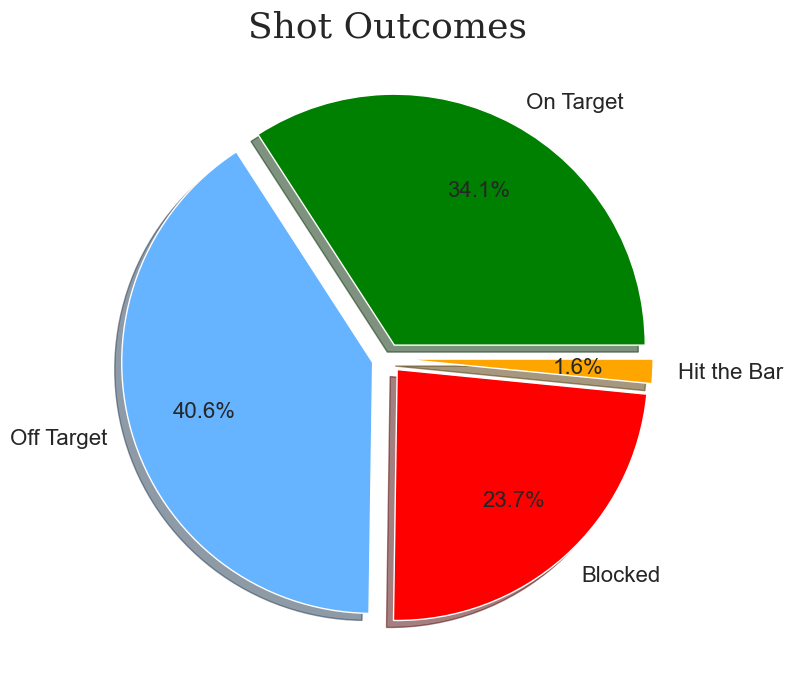

In [121]:
fig, ax = plt.subplots(figsize=[8,8])
labels = pie['shot_outcome']
colors = ['green','#66b3ff','red','orange']
plt.pie(x=pie['count'], autopct="%.1f%%", labels=labels, explode=[0.06]*4, pctdistance=0.7, colors=colors, shadow=True, \
       textprops=dict(fontsize=16))
plt.title("Shot Outcomes", fontsize=26, fontfamily='serif')
plt.tight_layout()
plt.show()

In [95]:
bar = shots[['shot_place', 'id_event']].groupby('shot_place').count().reset_index().rename(columns={'id_event': 'count'})
bar.shot_place = bar.shot_place.astype(int)
bar.shot_place = bar.shot_place.replace({1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', \
                                        5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar', 8: 'Misses to the left', \
                                        9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', \
                                        12: 'Top left corner', 13: 'Top right corner'})

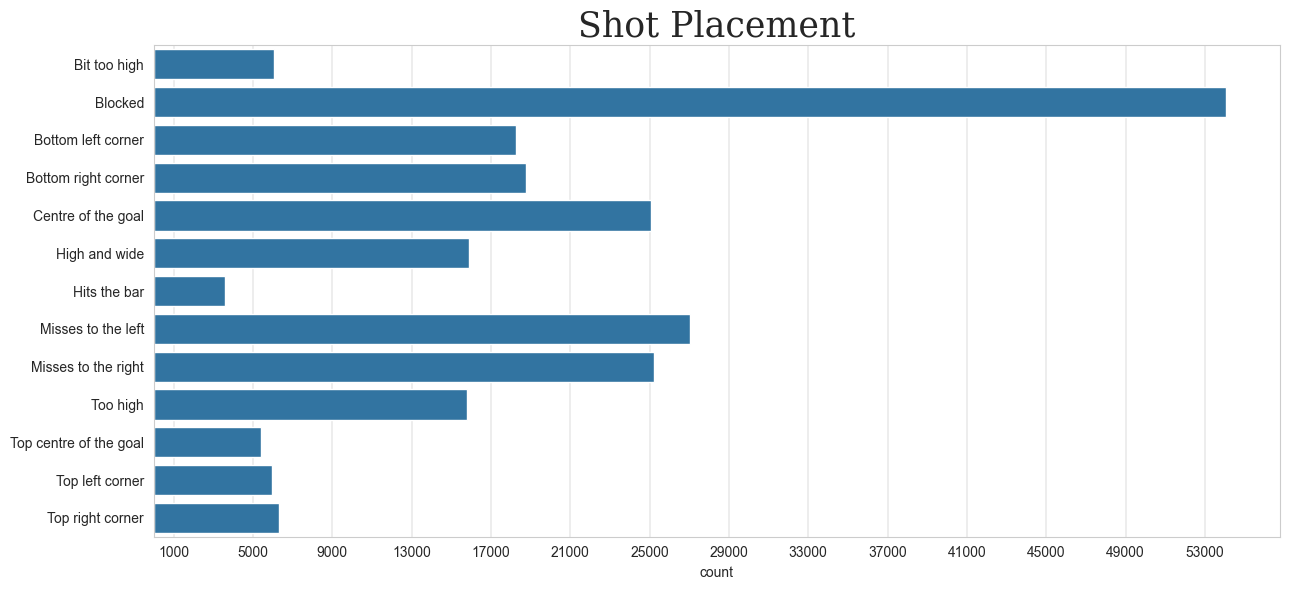

In [137]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[13,6])
labels = bar['shot_place']
ax = sns.barplot(x=bar['count'], y=labels)
ax.set_xticks(np.arange(1000,57000,4000))
ax.set_ylabel(ylabel='')
plt.title("Shot Placement", fontsize=25, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='x')
plt.show()

In [155]:
goals  = shots[['is_goal', 'id_event', 'country']].groupby(['is_goal', 'country']).count().reset_index().rename(columns={'id_event': 'count'})
goals.is_goal = goals.is_goal.replace({1: 'Goal', 0: 'No Goal'})

In [156]:
goals['percentage']=0
for i in range(len(goals)):
    for country in goals.country.unique():
        if goals.iloc[i,goals.columns.get_loc("country")]==country:
            goals.iloc[i,goals.columns.get_loc("percentage")]=goals.iloc[i,goals.columns.get_loc("count")] / \
                                                            goals[goals.country==country]['count'].sum()
goals['percentage']=round(goals['percentage']*100,2)

C:\Users\Islam\AppData\Local\Temp\ipykernel_8200\760186469.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8952583156404812' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  goals.iloc[i,goals.columns.get_loc("percentage")]=goals.iloc[i,goals.columns.get_loc("count")] / \


C:\Users\Islam\AppData\Local\Temp\ipykernel_8200\1257287813.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')


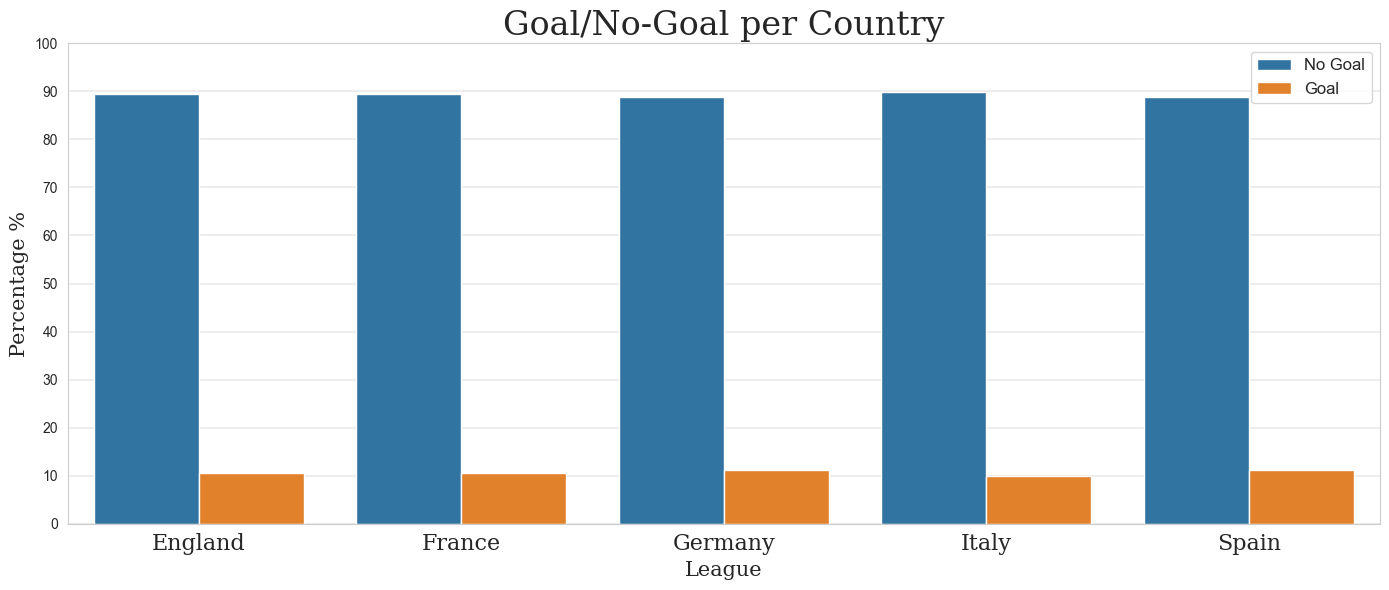

In [157]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=[14,6])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax = sns.barplot(data=goals, y='percentage', hue='is_goal', x='country')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='League', fontsize=15, fontfamily='serif')
ax.set_xticklabels(labels=ax.get_xticklabels(), fontsize=16, fontfamily='serif')
plt.title("Goal/No-Goal per Country", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=12)
plt.show()

In [147]:
goals1  = shots[['is_goal', 'id_event', 'year']].groupby(['is_goal', 'year']).count().reset_index().rename(columns={'id_event': 'count'})
goals1.is_goal = goals1.is_goal.replace({1: 'Goal', 0: 'No Goal'})

In [148]:
goals1['percentage']=0
for i in range(len(goals1)):
    for year in goals1.year.unique():
        if goals1.iloc[i,goals1.columns.get_loc("year")]==year:
            goals1.iloc[i,goals1.columns.get_loc("percentage")]=goals1.iloc[i,goals1.columns.get_loc("count")] / \
                                                            goals1[goals1.year==year]['count'].sum()
goals1['percentage']=round(goals1['percentage']*100,2)

C:\Users\Islam\AppData\Local\Temp\ipykernel_8200\3222462398.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.897809318111694' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  goals1.iloc[i,goals1.columns.get_loc("percentage")]=goals1.iloc[i,goals1.columns.get_loc("count")] / \


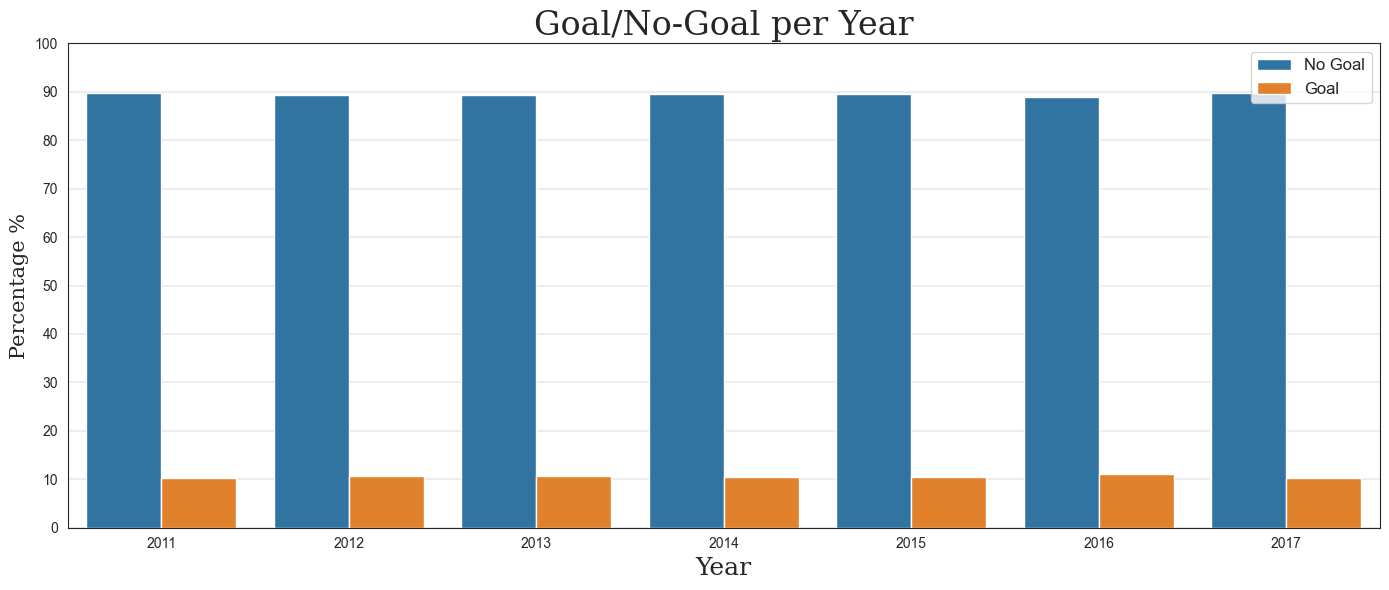

In [158]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=[14,6])
ax = sns.barplot(data=goals1, y='percentage', hue='is_goal', x='year')
ax.set_yticks(np.arange(0,110,10))
ax.set_ylabel(ylabel='Percentage %', fontsize=15, fontfamily='serif')
ax.set_xlabel(xlabel='Year', fontsize=18, fontfamily='serif')
plt.title("Goal/No-Goal per Year", fontsize=24, fontfamily='serif')
plt.tight_layout()
ax.grid(color='black', linestyle='-', linewidth=0.1, axis='y')
plt.legend(fontsize=12)
plt.show()

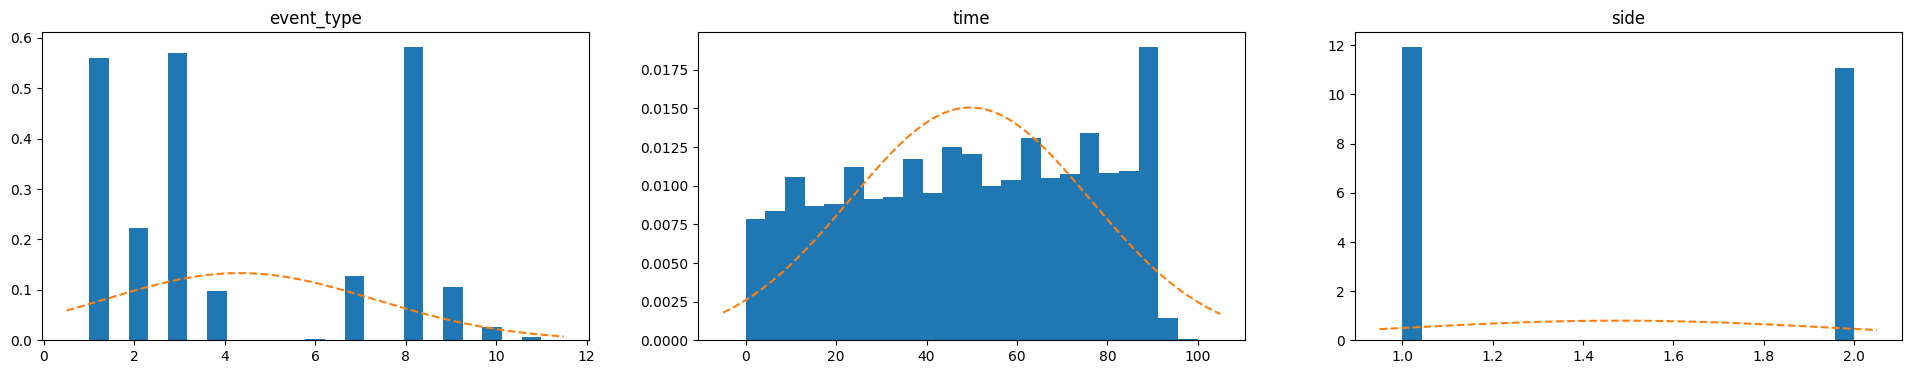

In [10]:
keys = ['event_type', 'time', 'side']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(events[key], density=True, bins=23)
    
    loc = events[key].mean()
    scale = events[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

### Статистический тест

В качестве статистического теста можно использовать непараметрический тест, например, тест Манна-Уитни (U-тест), чтобы проверить, есть ли статистически значимая разница в количестве голов между матчами с разной длительностью. Мы можем разделить матчи на две группы: например, матчи, в которых было больше 2,5 голов, и матчи, в которых было 2,5 и меньше голов. Затем мы можем использовать U-тест для проверки гипотезы о том, что распределение голов в этих двух группах одинаково.

Если p-значение меньше 0.05, это указывает на наличие статистически значимой разницы в количестве голов между матчами с более чем 2,5 головами и матчами с 2,5 и менее голами. Это может свидетельствовать о том, что матчи с большим количеством голов имеют разные характеристики по сравнению с матчами с меньшим количеством голов.

Statistic: 20583469.0, p-value: 0.0
Отвергаем нулевую гипотезу: существует статистически значимая разница между группами.


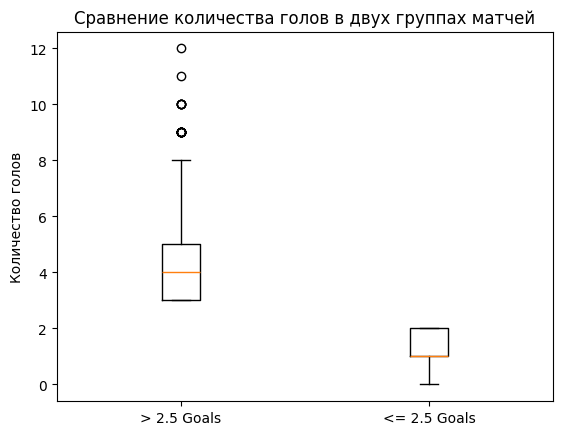

In [25]:
from scipy.stats import mannwhitneyu
goals_count = events.groupby('id_odsp')['is_goal'].sum().reset_index()
goals_count.rename(columns={'is_goal': 'total_goals'}, inplace=True)

# Объединение данных о голах с данными о матчах
merged_data = pd.merge(ginf, goals_count, on='id_odsp')

# Классификация матчей на две группы по количеству голов
group1 = merged_data[merged_data['total_goals'] > 2.5]['total_goals']
group2 = merged_data[merged_data['total_goals'] <= 2.5]['total_goals']

# Применение теста Манна-Уитни
stat, p_value = mannwhitneyu(group1, group2)

print(f'Statistic: {stat}, p-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимая разница между группами.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы между группами.")

# Визуализация
plt.boxplot([group1, group2], tick_labels=['> 2.5 Goals', '<= 2.5 Goals'])
plt.ylabel('Количество голов')
plt.title('Сравнение количества голов в двух группах матчей')
plt.show()

## Анализ и построение графиков для лиг

In [125]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [57]:
events_data.head(5)

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,High and wide,Off target,0.0,Left side of the box,left foot,Pass,Open play,0.0
1,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
2,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
3,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,None,NaN,0.0
4,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,...,NaN,NaN,NaN,NaN,0.0,Defensive half,NaN,None,NaN,0.0


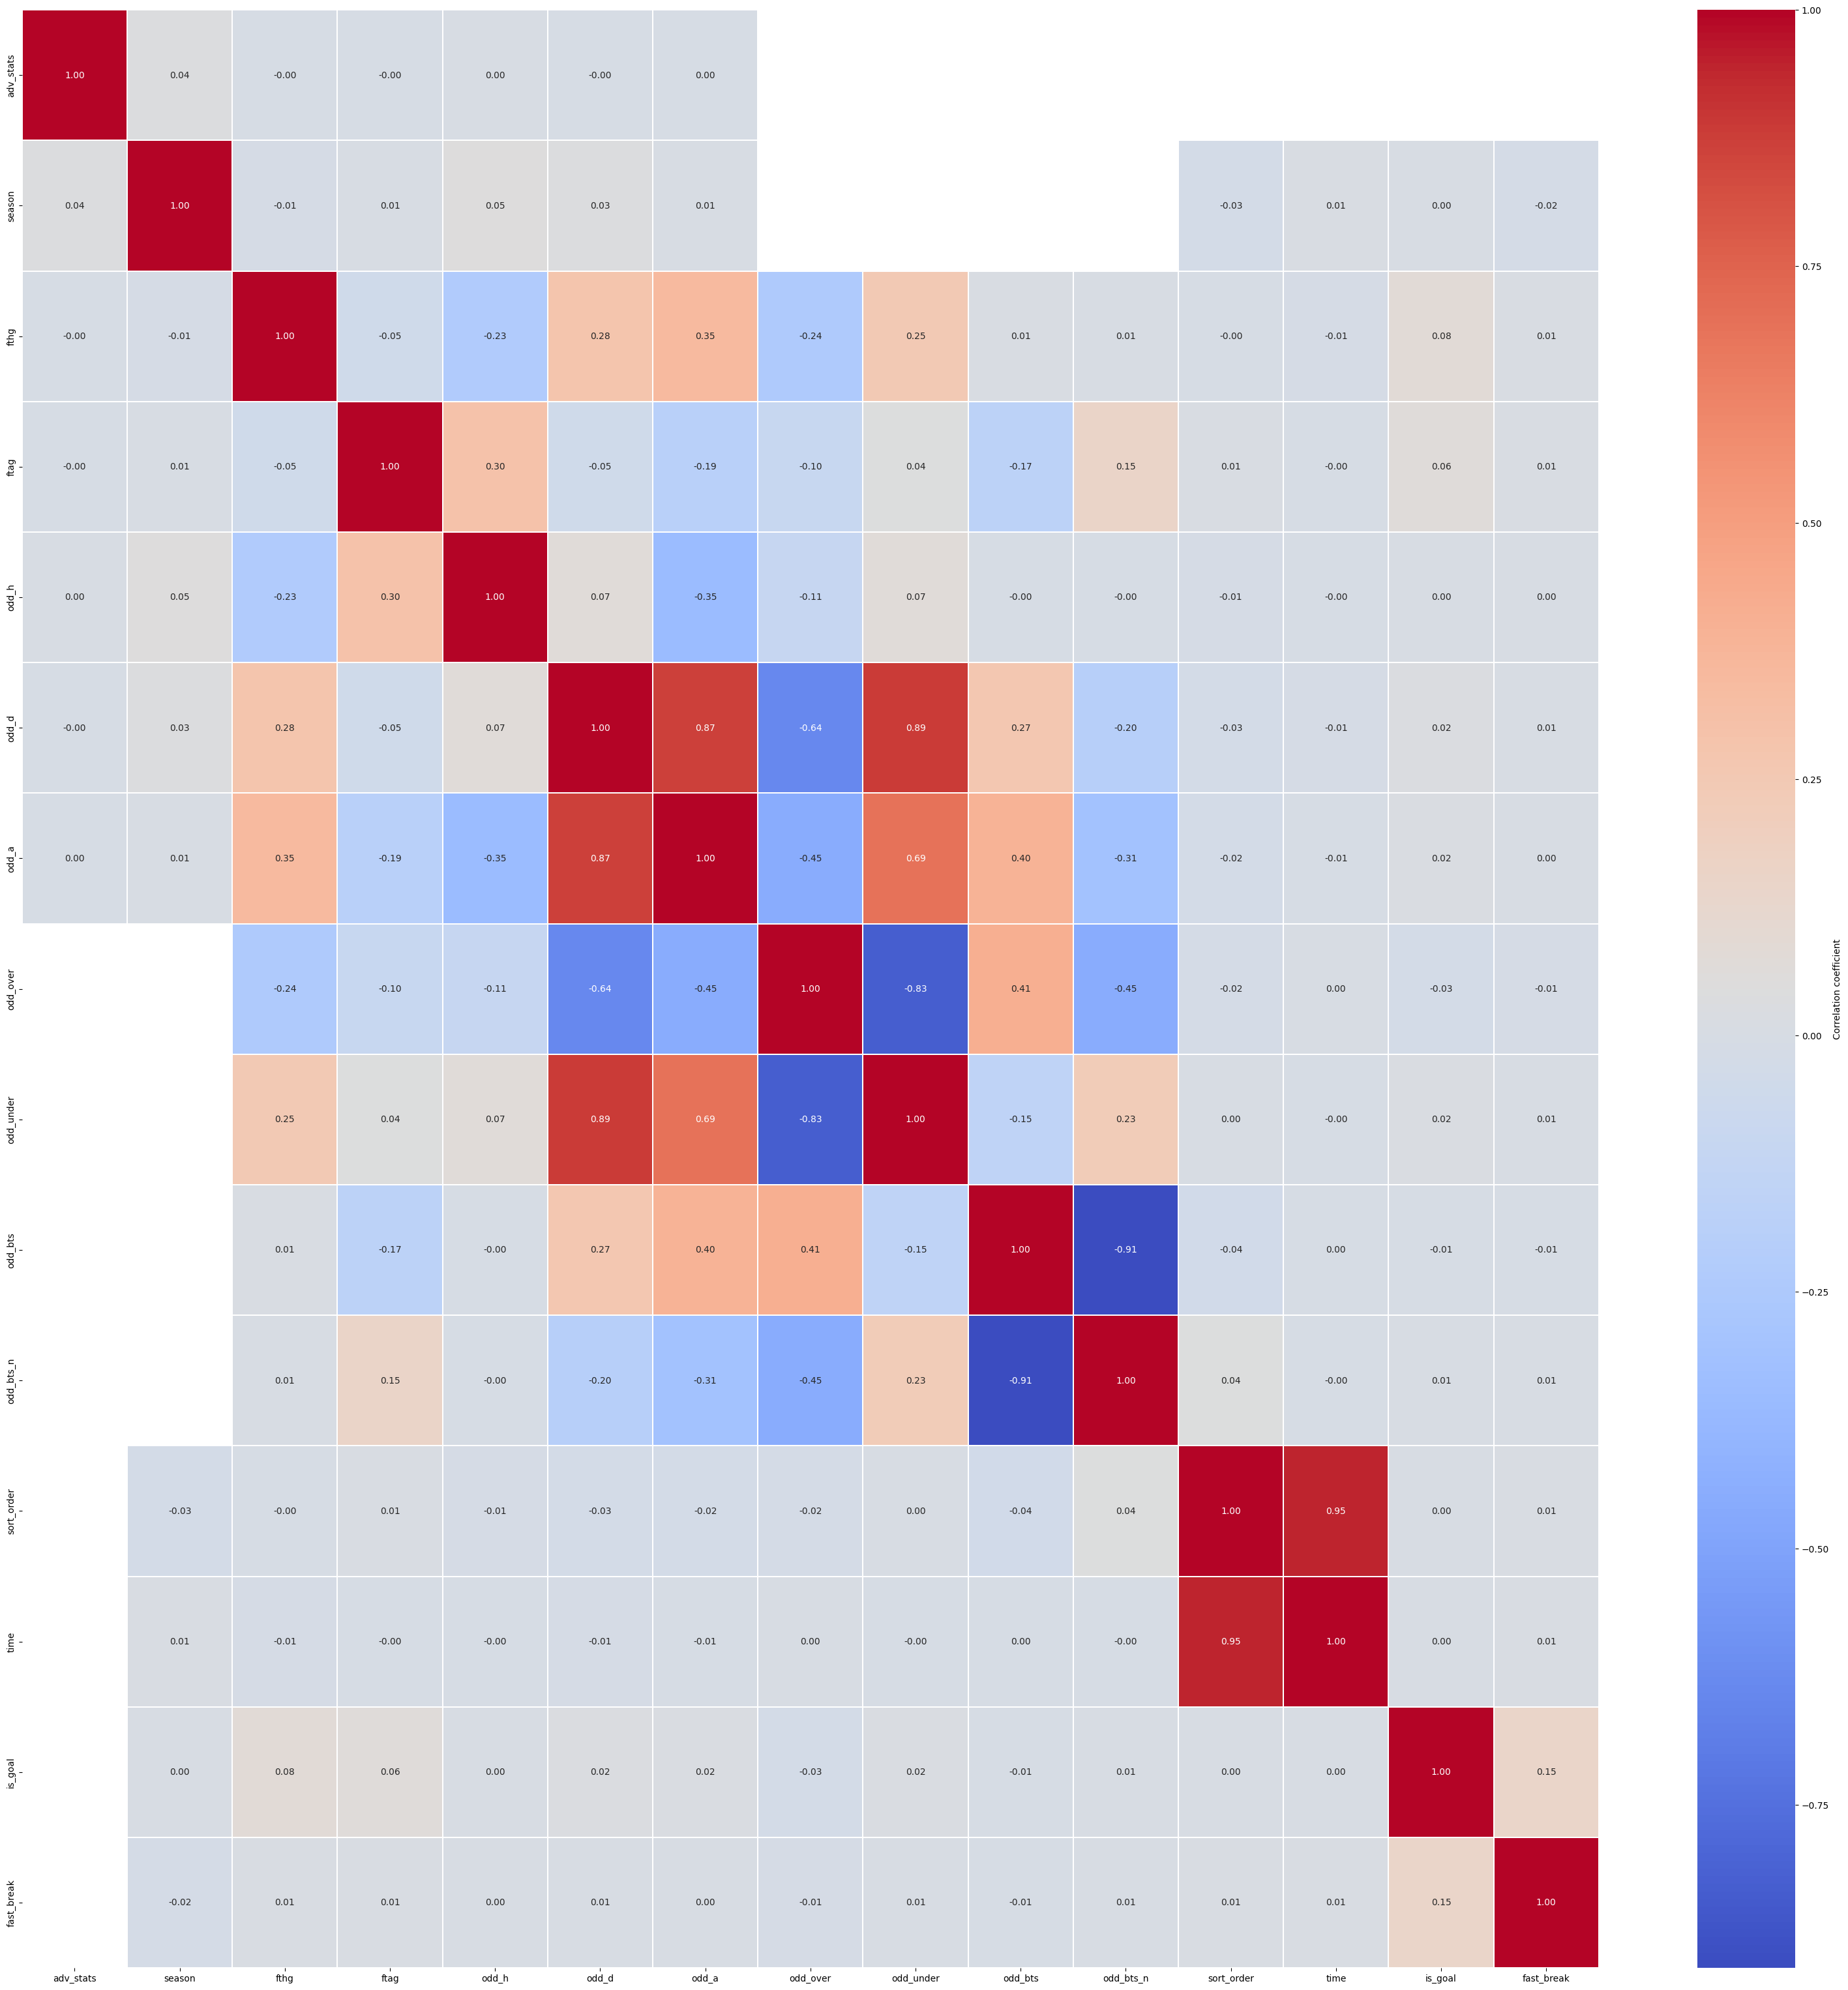

In [66]:
plt.subplots(figsize=(len(events_data.columns), len(events_data.columns)))
sns.heatmap(events_data.corr(numeric_only=True),annot=True, cmap='coolwarm', 
            cbar_kws={"label": "Correlation coefficient"},
            linewidths=0.1, fmt='.2f')
plt.show()

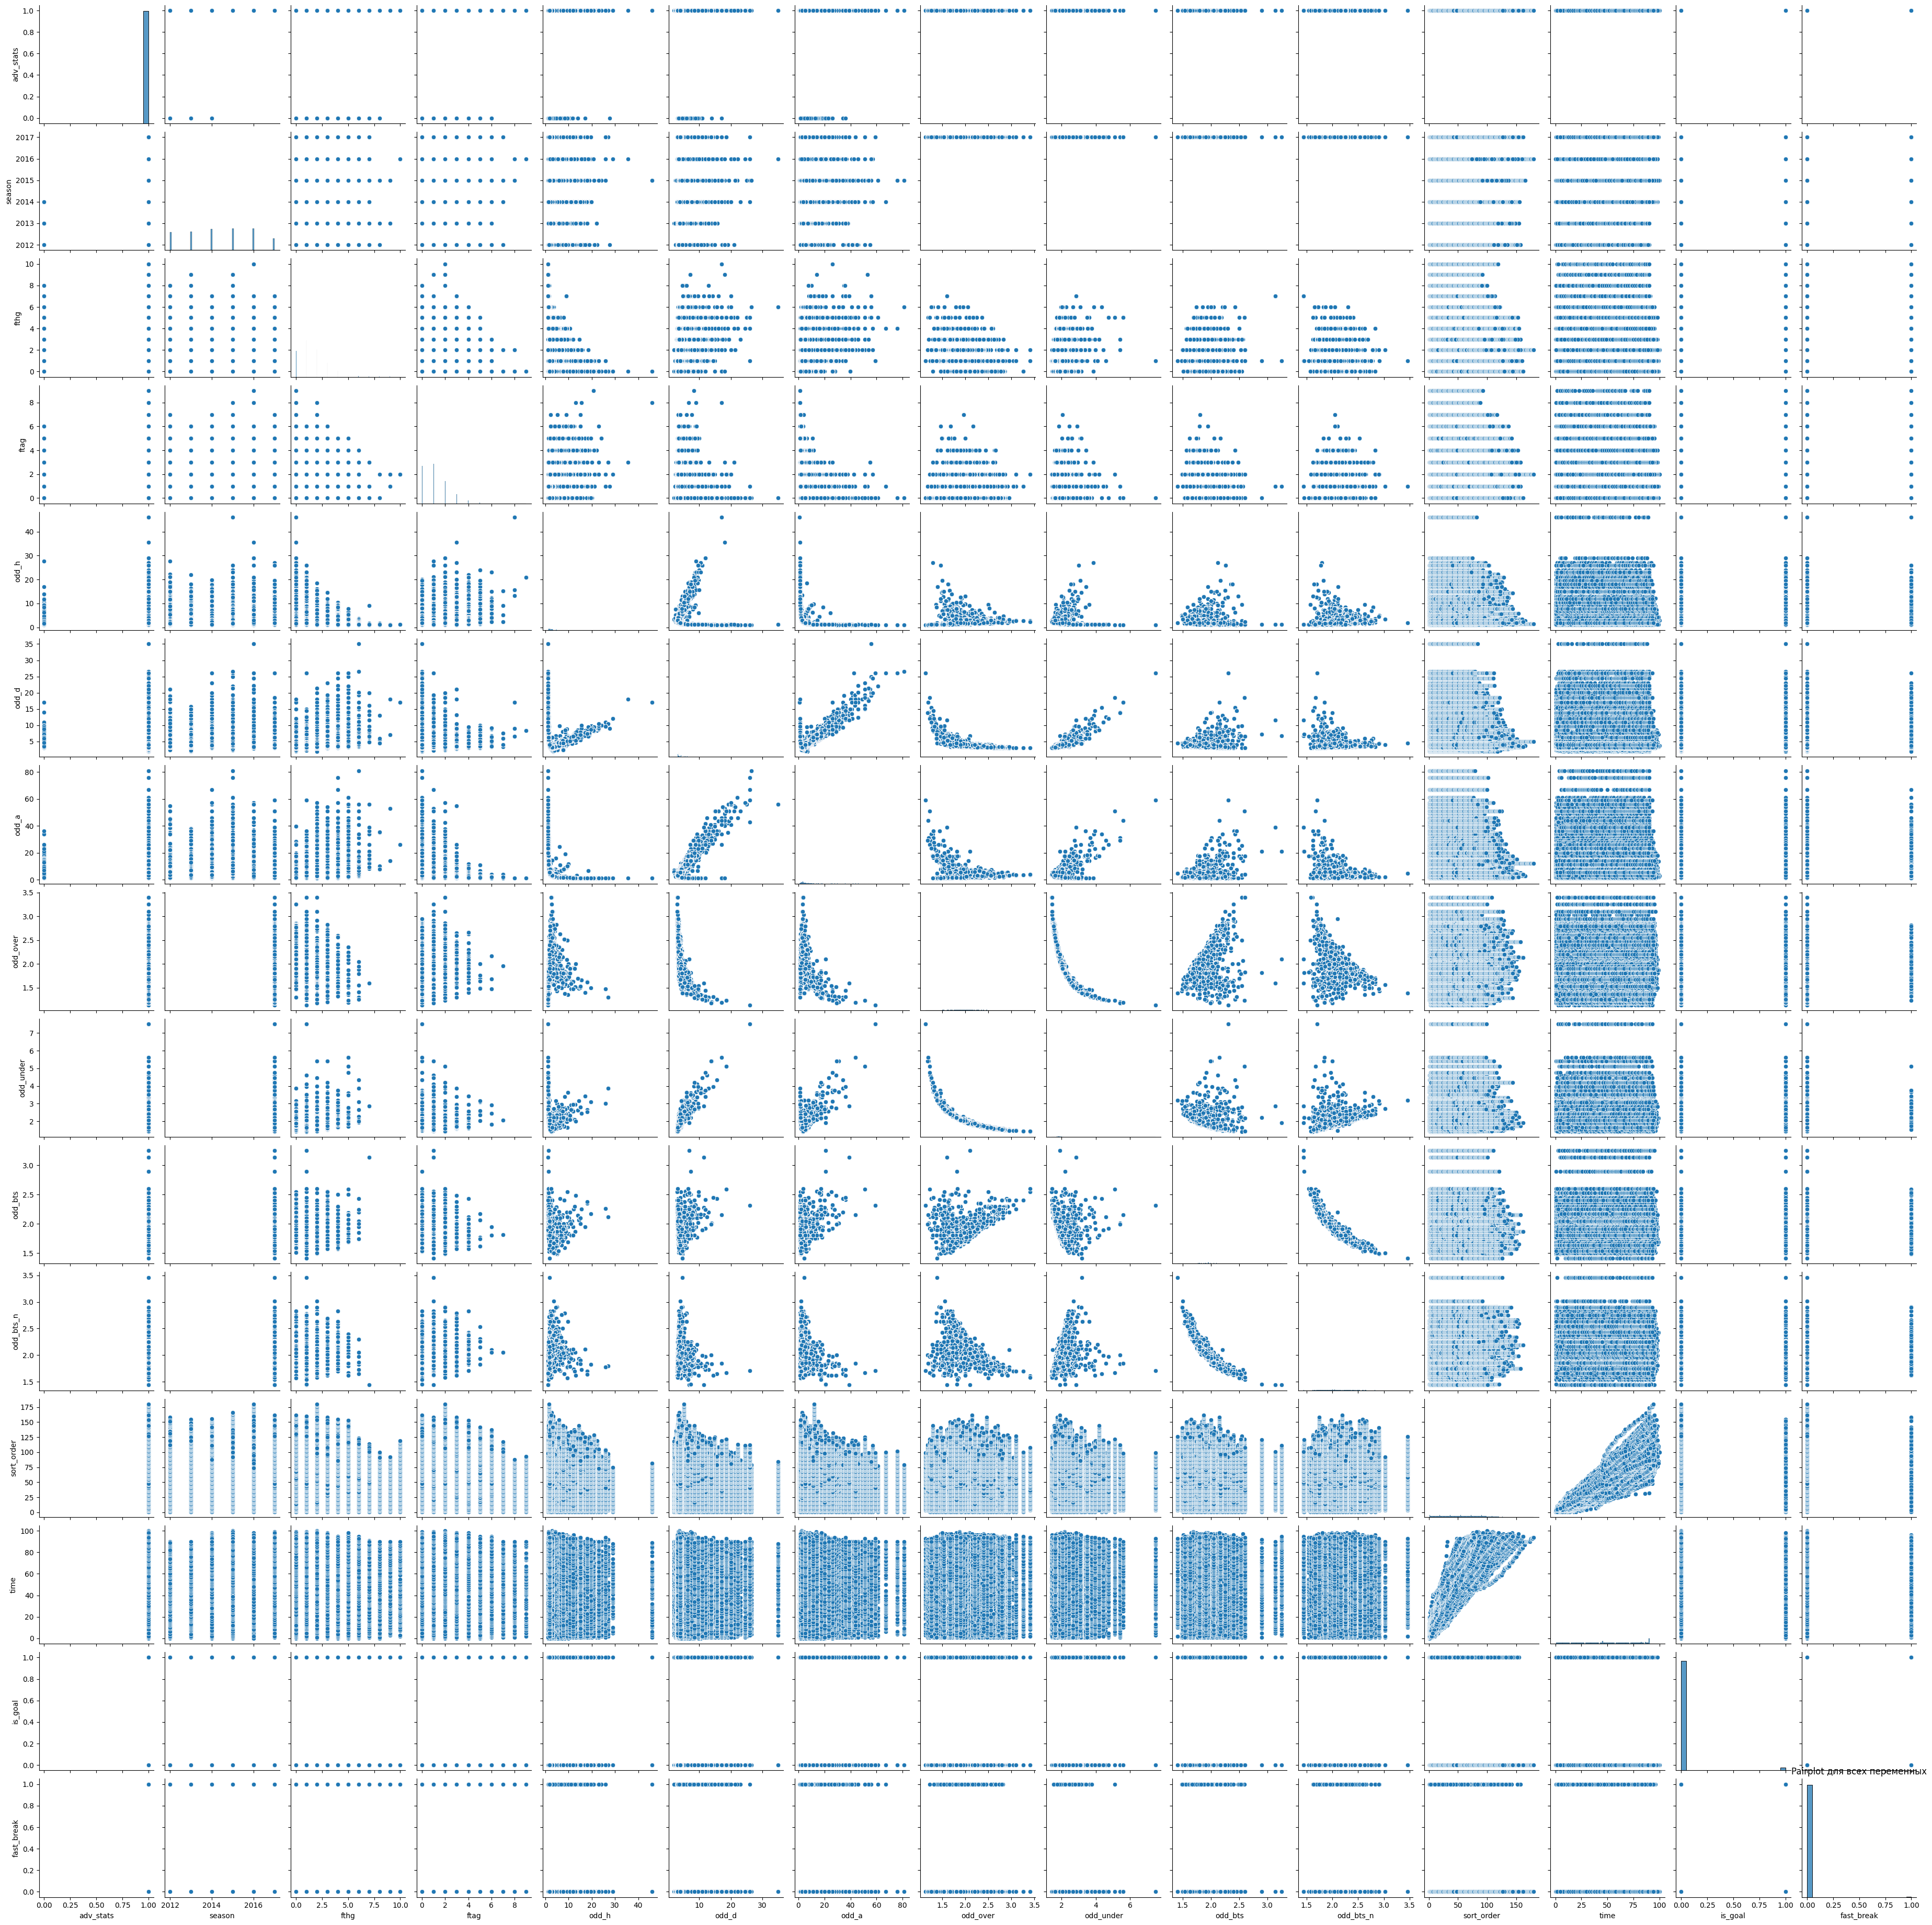

In [9]:
sns.pairplot(events_data)
plt.title("Pairplot для всех переменных")
plt.show()

## Фильтрация событий для Лионеля Месси

Поскольку нас интересует анализ карьеры Лионеля Месси, я отфильтровал только те события из DataFrame *events_data*, которые связаны с Лионелем Месси, исключив все остальные события.

In [9]:
lionel_messi_events = events_data.loc[events_data["player"]=="lionel messi"]
lionel_messi_events.head(5)

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
9142,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,5,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,0.0
9147,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,5,...,NaN,NaN,3.0,1.0,0.0,7.0,2.0,1.0,1.0,0.0
9151,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,5,...,NaN,NaN,4.0,1.0,0.0,15.0,2.0,0.0,1.0,0.0
9155,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,5,...,NaN,NaN,NaN,NaN,0.0,1.0,NaN,0.0,NaN,0.0
9164,2mfCxQlt/,/soccer/spain/primera-division-2011-2012/barce...,True,2011-08-29,SP1,2012,spain,Barcelona,Villarreal,5,...,NaN,NaN,NaN,NaN,0.0,1.0,NaN,0.0,NaN,0.0


### Вычисление важных статистических данных

Для нападающего (и №10) наиболее важными статистическими данными являются **средние голы за игру**, **попытки**, а также **эффективность** штрафных и пенальти. Их можно считать некоторыми из **ключевых показателей эффективности (KPI)** для нападающего, такого как Лионель Месси.

#### 1. Среднее количество голов за игру (GPG)

**Средний показатель голов за игру (GPG)** можно определить как количество голов, которое игрок, как ожидается, забьет за матч, в котором он сыграет. Это важный статистический показатель для определения того, насколько хорош игрок, когда дело касается забивания голов в играх, и его можно рассчитать, разделив общее количество забитых голов на общее количество сыгранных матчей.

In [10]:
lionel_messi_goals = lionel_messi_events.loc[events_data["is_goal"]==1 & (events_data["event_type2"]!="Own goal")]

# GPG
lionel_messi_matches = lionel_messi_events.groupby(["id_odsp", "season"])["is_goal"].sum().reset_index()
avg_GPG = pd.DataFrame({"avg_GPG" : (lionel_messi_goals.groupby("season").count().is_goal) / (lionel_messi_matches.groupby("season").count().id_odsp)}).reset_index()

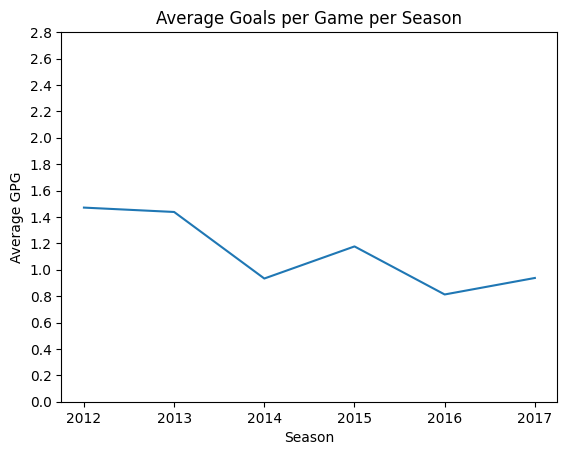

In [11]:
plt.plot(avg_GPG["season"], avg_GPG["avg_GPG"])
plt.title("Average Goals per Game per Season")
plt.xlabel("Season")
plt.ylabel("Average GPG")
plt.yticks(np.arange(0, 3, step=0.2))
plt.show()

In [24]:
print("\nКоличество сыгранных матчей: ", lionel_messi_matches.count().id_odsp)
print("Количество забитых мячей: ", lionel_messi_goals.count().id_odsp)
print("GPG (в среднем голов за матч): ", round(avg_GPG.mean().avg_GPG, 2))


Количество сыгранных матчей:  178
Количество забитых мячей:  205
GPG (в среднем голов за матч):  1.13


In [ ]:
keys = ["is_goal", "lionel_messi_goals"]
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = events_data[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

Лионель Месси сохранил среднее значение GPG на уровне **1,13**, что означает, что в среднем Лео забивал как минимум 1 гол в каждом матче, в котором он играл. Это довольно впечатляющий показатель для нападающего с точки зрения способности забивать голы.

Но как Лео удается забивать в среднем 1 гол в каждой игре, в которой он играет? Чтобы лучше это понять, давайте взглянем на статистику его попыток, которая включает количество попыток забить гол, сделанных Лео за матч.

#### 2. Статистика попыток

In [43]:
lionel_messi_attempts = lionel_messi_events.loc[lionel_messi_events["event_type"]=="Attempt"]
print("\nОбщее количество попыток: ", lionel_messi_attempts.count().id_odsp)
print("Общее количество матчей: ", lionel_messi_matches.count().id_odsp)
print("Среднее количество попыток за матч: ", round((lionel_messi_attempts.count().id_odsp) / (lionel_messi_matches.count().id_odsp), 4))

# Попыток для гола
print("Требуемое количество попыток для создания гола: ", round((lionel_messi_attempts.count().id_odsp) / (lionel_messi_goals.count().id_odsp), 4))


Общее количество попыток:  914
Общее количество матчей:  178
Среднее количество попыток за матч:  5.1348
Требуемое количество попыток для создания гола:  4.4585


Хотя Лео в среднем тратит **4,45 попыток, чтобы забить гол**, ему удается забить гол в каждой игре, регистрируя несколько попыток, в среднем **5,13 попыток за матч**. Благодаря такому большому количеству попыток Лео в итоге забивает по крайней мере 1 гол из нескольких попыток.

Наличие более 5 попыток в среднем является отличным показателем того, насколько Лео жаждет забивать голы и побеждать в играх, что делает его одним из величайших футболистов, которых мы знаем.

#### 3. Штрафные и пенальти

In [31]:
lionel_messi_penalties = lionel_messi_events.loc[lionel_messi_events["location"]=="Penalty spot"]

# Эффективность пенальти
penalty_goals = lionel_messi_penalties.loc[lionel_messi_penalties["is_goal"]==1]
print("\nКоличество пенальти: ", lionel_messi_penalties.count().id_odsp)
print("Количество голов в пенальти: ", penalty_goals.count().id_odsp)
print("Эффективность пенальти: ", round((penalty_goals.count().id_odsp) / (lionel_messi_penalties.count().id_odsp), 4))


Количество пенальти:  37
Количество голов в пенальти:  30
Эффективность пенальти:  0.8108


Из 37 пенальти было реализовано 30, что дало Лео эффективность пенальти **81%**

In [33]:
lionel_messi_free_kicks = lionel_messi_events.loc[lionel_messi_events["situation"]=="Free kick"]

# Эффективность свободных ударов (штрафных)
free_kick_goals = lionel_messi_free_kicks.loc[lionel_messi_free_kicks["is_goal"]==1]
print("\nКоличество свободных ударов: ", lionel_messi_free_kicks.count().id_odsp)
print("Количество голов с свободных ударов: ", free_kick_goals.count().id_odsp)
print("Эффективность свободных ударов: ", round((free_kick_goals.count().id_odsp) / (lionel_messi_free_kicks.count().id_odsp), 4))


Количество свободных ударов:  86
Количество голов с свободных ударов:  14
Эффективность свободных ударов:  0.1628


Лео реализовал лишь 14 из 86 штрафных ударов (эффективность **16,2%**).

#### 4. Ассисты и ассистенты


Процент забитых Месси с голевой передачи от партнёра:  65.3659

Ассистенты:


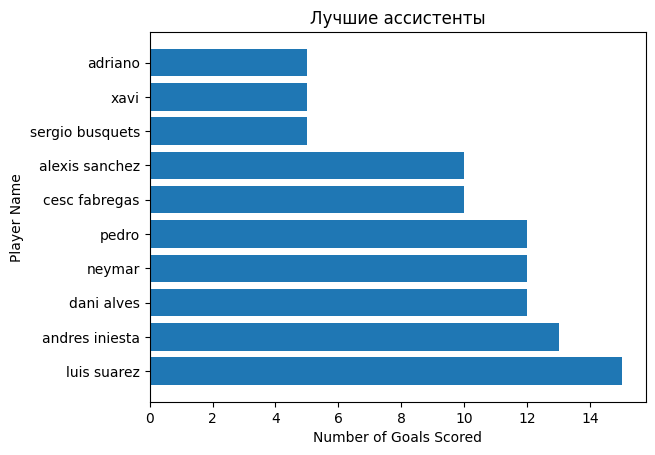

In [37]:
goals_from_assists = lionel_messi_goals.loc[lionel_messi_goals["assist_method"]!="None"]
print("\nПроцент забитых Месси с голевой передачи от партнёра: ", round(100*((goals_from_assists.count().id_odsp)/(lionel_messi_goals.count().id_odsp)), 4))

print("\nАссистенты:")

# Лучшие ассистенты для Месси
assisters = lionel_messi_goals.groupby("player2").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(assisters["player2"], assisters["id_odsp"])
plt.title("Лучшие ассистенты")
plt.xlabel("Number of Goals Scored")
plt.ylabel("Player Name")
plt.show()

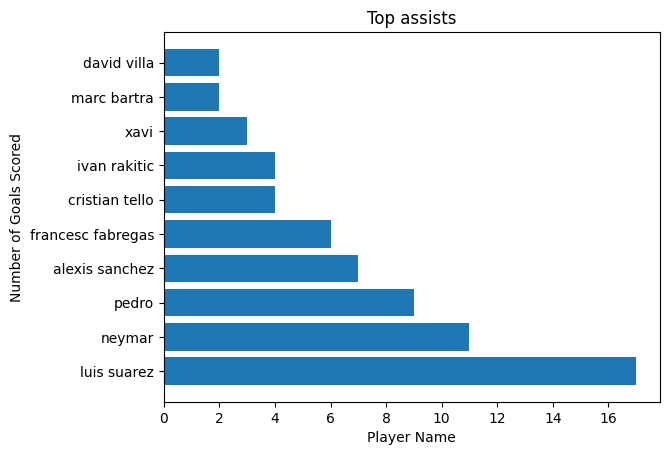

In [47]:
# Партнёр, для кого Месси является лучшим ассистентом
lionel_messi_assists = events_data.loc[(events_data["assist_method"]!="None") & (events_data["is_goal"]==1) & (events_data["player2"]=="lionel messi")]
assists = lionel_messi_assists.groupby("player").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(assists["player"], assists["id_odsp"])
plt.title("Top assists")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

---

## Анализ топ-5 лиг

#### Фильтруем каждую лигу по отдельности

In [39]:
events_data["goals_scored"] = events_data["fthg"] + events_data["ftag"]

bundesliga = events_data.loc[events_data["country"]=="germany"]
laliga = events_data.loc[events_data["country"]=="spain"]
ligue1 = events_data.loc[events_data["country"]=="france"]
premierleague = events_data.loc[events_data["country"]=="england"]
seriea = events_data.loc[events_data["country"]=="italy"]

#### Данные по совпадениям

In [40]:
bundesliga_matches = bundesliga.groupby(["id_odsp", "season"])["is_goal"].sum().reset_index()   
laliga_matches = laliga.groupby(["id_odsp", "season"])["is_goal"].sum().reset_index()
ligue1_matches = ligue1.groupby(["id_odsp", "season"])["is_goal"].sum().reset_index()
premierleague_matches = premierleague.groupby(["id_odsp", "season"])["is_goal"].sum().reset_index()
seriea_matches = seriea.groupby(["id_odsp", "season"])["is_goal"].sum().reset_index()

#### Голов за матч в каждой лиге

In [41]:
bundesliga_goals = bundesliga.loc[bundesliga["is_goal"]==1]
laliga_goals = laliga.loc[laliga["is_goal"]==1]
ligue1_goals = ligue1.loc[ligue1["is_goal"]==1]
premierleague_goals = premierleague.loc[premierleague["is_goal"]==1]
seriea_goals = seriea.loc[seriea["is_goal"]==1]

In [42]:
print("Average goals-per-game for Europe's 5 major leagues")

# Bundesliga
print("Bundesliga: ", round(bundesliga.goals_scored.mean(), 4))
# La Liga
print("La Liga: ", round(laliga.goals_scored.mean(), 4))
# Ligue 1
print("Ligue 1: ", round(ligue1.goals_scored.mean(), 4))
# Premier League
print("Premier League: ", round(premierleague.goals_scored.mean(), 4))
# Serie A
print("Serie A: ", round(seriea.goals_scored.mean(), 4))

Average goals-per-game for Europe's 5 major leagues
Bundesliga:  2.8739
La Liga:  2.7742
Ligue 1:  2.5187
Premier League:  2.7382
Serie A:  2.6521


#### Количество свободных ударов за матч

In [166]:
# Free kicks for each league
print("\nAverage number of free kicks per match")

# Bundesliga
print("Bundesliga: ", round(bundesliga.loc[bundesliga["situation"]=="Free kick"].id_odsp.count() / bundesliga_matches.id_odsp.count(), 4))
# La Liga
print("La Liga: ", round(laliga.loc[laliga["situation"]=="Free kick"].id_odsp.count() / laliga_matches.id_odsp.count(), 4))
# Ligue 1
print("Ligue 1: ", round(ligue1.loc[ligue1["situation"]=="Free kick"].id_odsp.count() / ligue1_matches.id_odsp.count(), 4))
# Premier League
print("Premier League: ", round(premierleague.loc[premierleague["situation"]=="Free kick"].id_odsp.count() / premierleague_matches.id_odsp.count(), 4))
# Serie A
print("Serie A: ", round(seriea.loc[seriea["situation"]=="Free kick"].id_odsp.count() / seriea_matches.id_odsp.count(), 4))


Average number of free kicks per match
Bundesliga:  0.5805
La Liga:  0.5653
Ligue 1:  0.5918
Premier League:  0.2995
Serie A:  0.6543


## Лучшие голеадоры и ассистенты в топ-5 лигах за 2012-2017 года

#### Лучшие голеадоры

##### 1. Bundesliga

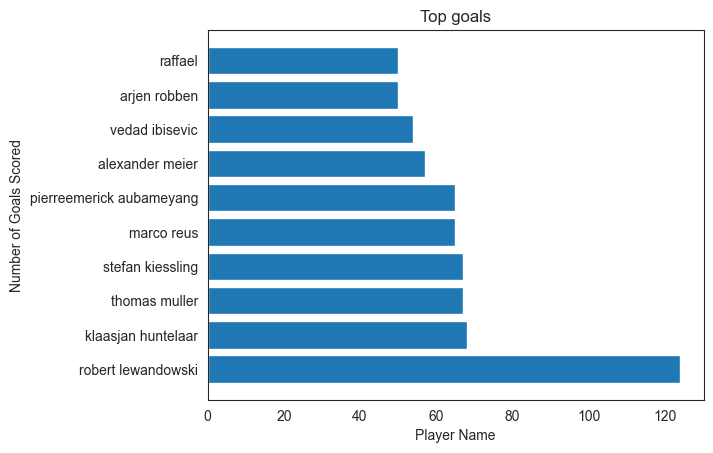

In [168]:
bundesliga_assisters = bundesliga_goals.groupby("player").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(bundesliga_assisters["player"], bundesliga_assisters["id_odsp"])
plt.title("Top goals")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

##### 2. La Liga

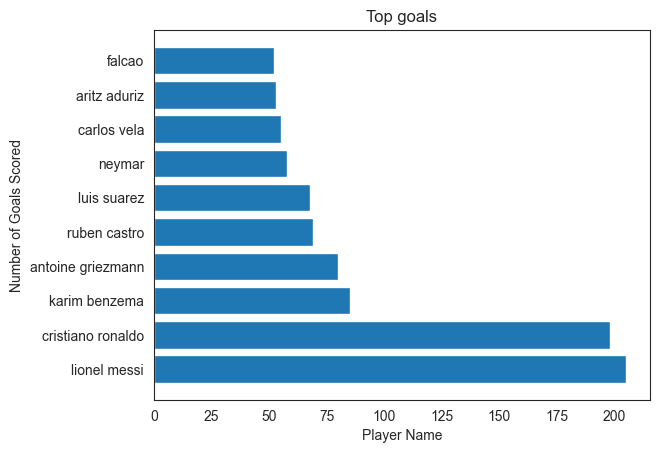

In [179]:
laliga_assisters = laliga_goals.groupby("player").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(laliga_assisters["player"], laliga_assisters["id_odsp"])
plt.title("Top goals")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

##### 3. Ligue 1

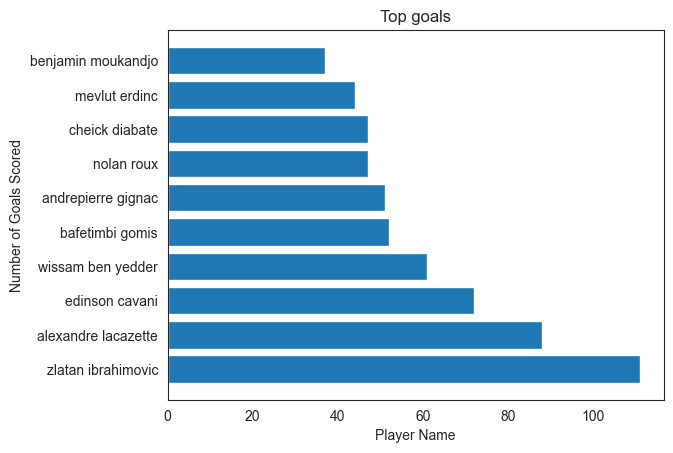

In [180]:
ligue1_assisters = ligue1_goals.groupby("player").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(ligue1_assisters["player"], ligue1_assisters["id_odsp"])
plt.title("Top goals")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

##### 4. Premier League

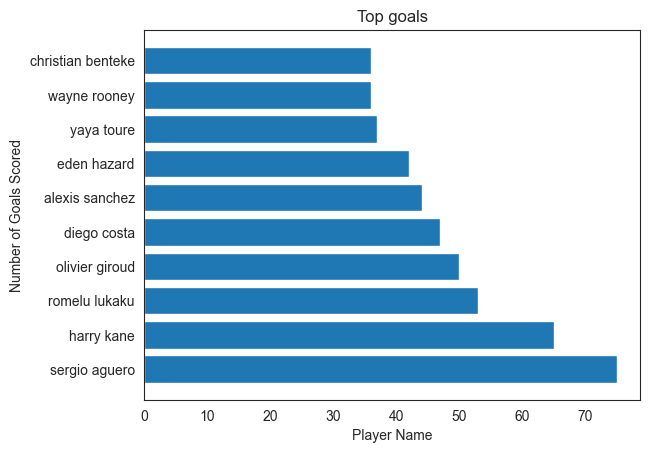

In [181]:
premierleague_assisters = premierleague_goals.groupby("player").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(premierleague_assisters["player"], premierleague_assisters["id_odsp"])
plt.title("Top goals")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

##### 5. Serie A

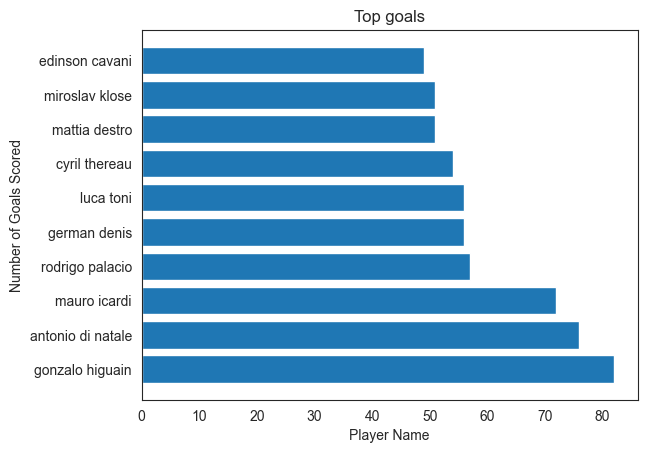

In [182]:
seriea_assisters = seriea_goals.groupby("player").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(seriea_assisters["player"], seriea_assisters["id_odsp"])
plt.title("Top goals")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

#### Лучшие "ассистенты"

##### 1. Bundesliga

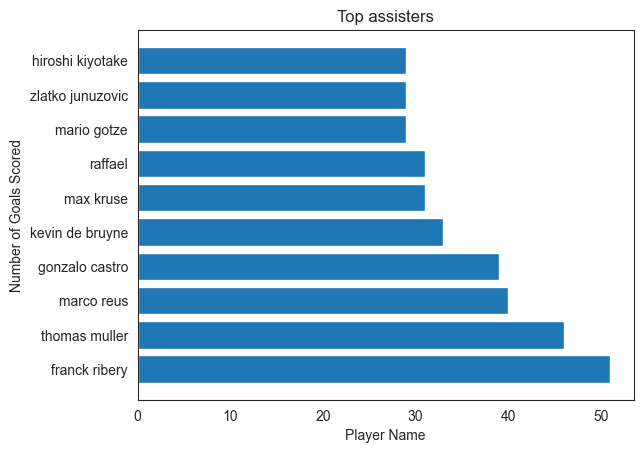

In [174]:
bundesliga_assisters = bundesliga_goals.groupby("player2").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(bundesliga_assisters["player2"], bundesliga_assisters["id_odsp"])
plt.title("Top assisters")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

##### 2. La Liga

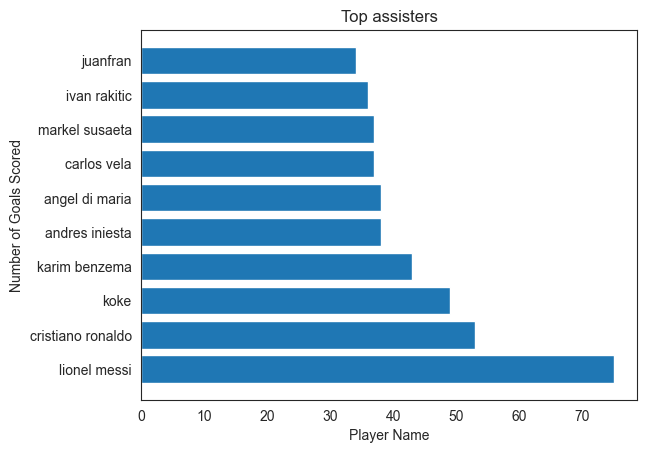

In [175]:
laliga_assisters = laliga_goals.groupby("player2").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(laliga_assisters["player2"], laliga_assisters["id_odsp"])
plt.title("Top assisters")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

##### 3. Ligue 1

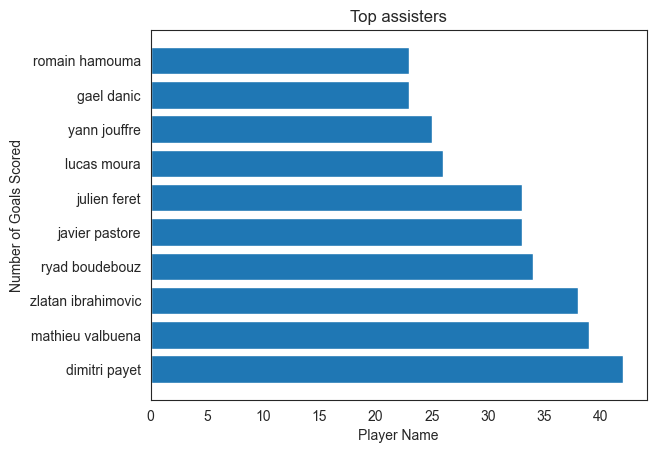

In [176]:
ligue1_assisters = ligue1_goals.groupby("player2").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(ligue1_assisters["player2"], ligue1_assisters["id_odsp"])
plt.title("Top assisters")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

##### 4. Premier League

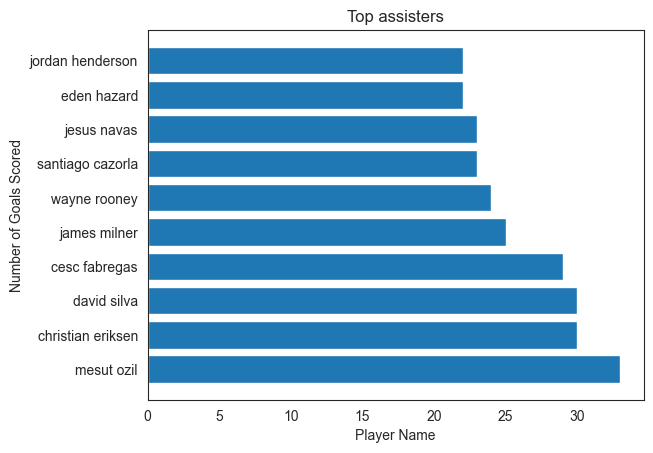

In [177]:
premierleague_assisters = premierleague_goals.groupby("player2").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(premierleague_assisters["player2"], premierleague_assisters["id_odsp"])
plt.title("Top assisters")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()

##### 5. Serie A

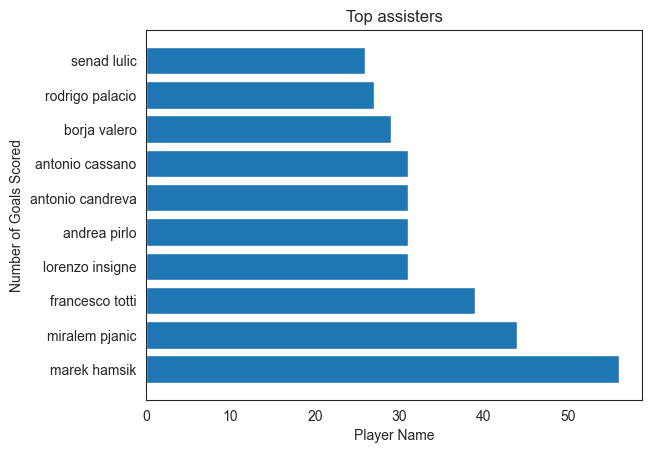

In [178]:
seriea_assisters = seriea_goals.groupby("player2").count().id_odsp.sort_values(ascending=False).head(10).reset_index()
plt.barh(seriea_assisters["player2"], seriea_assisters["id_odsp"])
plt.title("Top assisters")
plt.xlabel("Player Name")
plt.ylabel("Number of Goals Scored")
plt.show()